<a href="https://colab.research.google.com/github/mrunali1415/LGMVIP--DataScience/blob/main/LGMVIP_Data_Science_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lets Grow More-Data Science Internship-TASK-2 (Stock Market Prediction And Forecasting Using Stacked LSTM)

---



# 1) Import the necessary libraries

In [ ]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

# 2) Loading Iris data

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [ ]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


# 3) list of column name

In [ ]:
col_name = ['Date','Open','High','Low','Last','Close','Total Trade Quantity','Turnover (Lacs)']

In [ ]:
data1 = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv", names = col_name)

# 4) Exploratory Data Analysis

###Number of columns and rows in lris dataset

In [ ]:
data1.shape

(2036, 8)

###for top 5 rows

In [ ]:
data1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
2,2018-09-27,234.55,236.8,231.1,233.8,233.25,5082859,11859.95
3,2018-09-26,240,240,232.5,235,234.25,2240909,5248.6
4,2018-09-25,233.3,236.75,232,236.25,236.1,2349368,5503.9


###Datatypes in dataset

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  2036 non-null   object
 1   Open                  2036 non-null   object
 2   High                  2036 non-null   object
 3   Low                   2036 non-null   object
 4   Last                  2036 non-null   object
 5   Close                 2036 non-null   object
 6   Total Trade Quantity  2036 non-null   object
 7   Turnover (Lacs)       2036 non-null   object
dtypes: object(8)
memory usage: 127.4+ KB


In [ ]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

###Summary of the dataset

In [ ]:
data1.describe()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2036,2036,2036,2036,2036,2036,2036,2036
unique,2036,1166,1258,1264,1269,1314,2035,2031
top,Date,148,135,141,154.2,141.9,839802,2140.22
freq,1,12,14,11,7,6,2,2


In [ ]:
data1.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2031,2010-07-27,117.6,119.5,112,118.8,118.65,586100,694.98
2032,2010-07-26,120.1,121,117.1,117.1,117.6,658440,780.01
2033,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2034,2010-07-22,120.3,122,120.25,120.75,120.9,293312,355.17
2035,2010-07-21,122.1,123,121.05,121.1,121.55,658666,803.56


In [ ]:
data1['Date'].value_counts()

Date          1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-12    1
2016-01-13    1
2016-01-14    1
2016-01-15    1
2010-07-21    1
Name: Date, Length: 2036, dtype: int64

###Checking Null Values in dataset

In [ ]:
data1.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

###Counting the data values of each column

In [ ]:
data1.count()

Date                    2036
Open                    2036
High                    2036
Low                     2036
Last                    2036
Close                   2036
Total Trade Quantity    2036
Turnover (Lacs)         2036
dtype: int64

# 5) Data Visualization

###Lets draw the pairplot with respect to "Turnover (Lacs)"

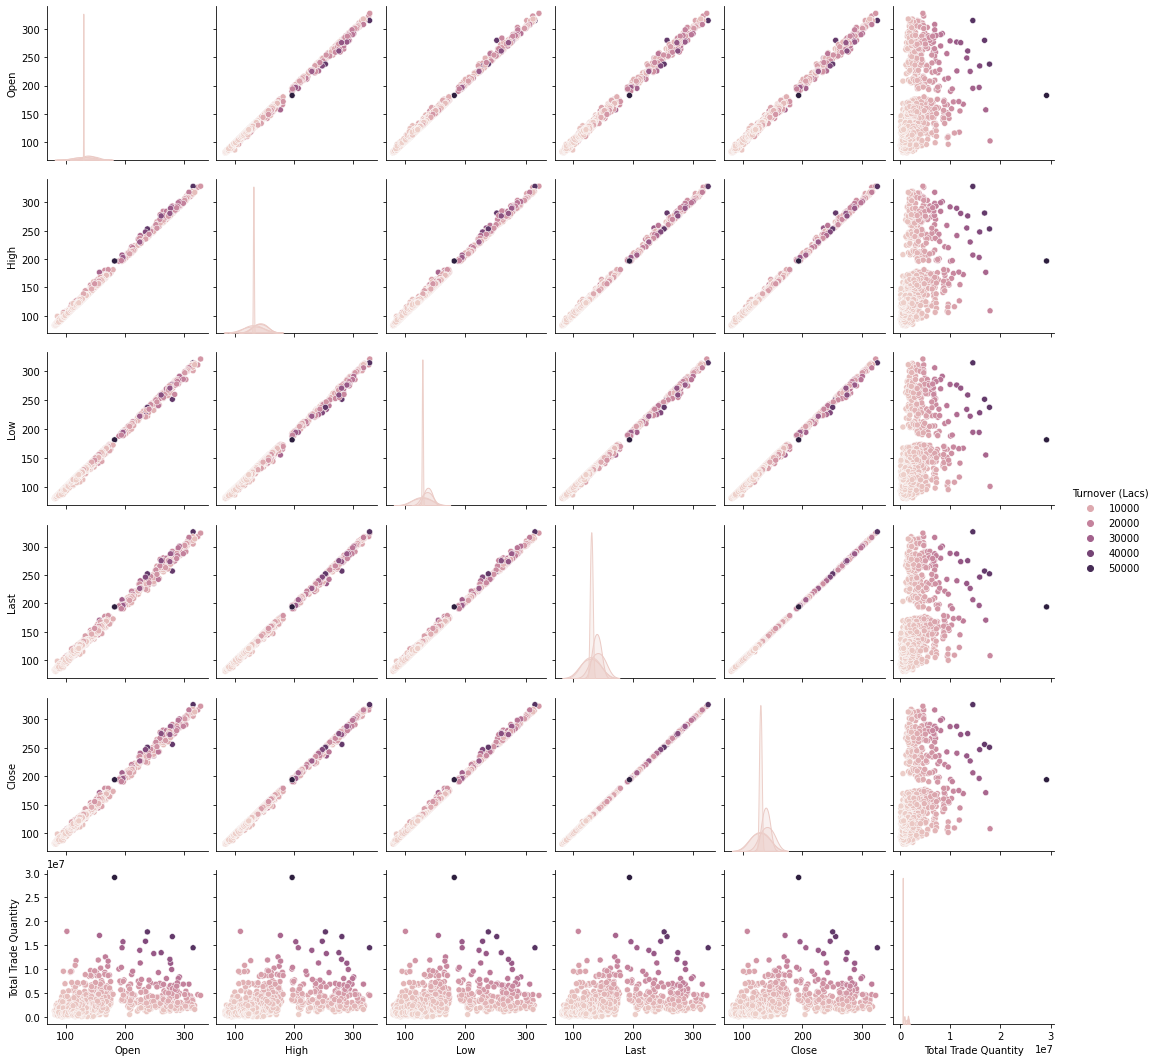

In [ ]:
sb.pairplot(data,hue='Turnover (Lacs)')
plt.show()

In [ ]:
data_close=data.reset_index()['Close']
data_turnover=data.reset_index()['Turnover (Lacs)']

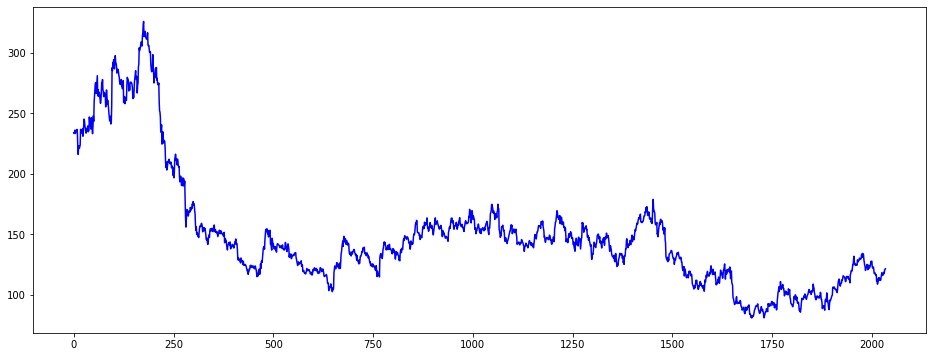

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data_close,color='b')
plt.show()

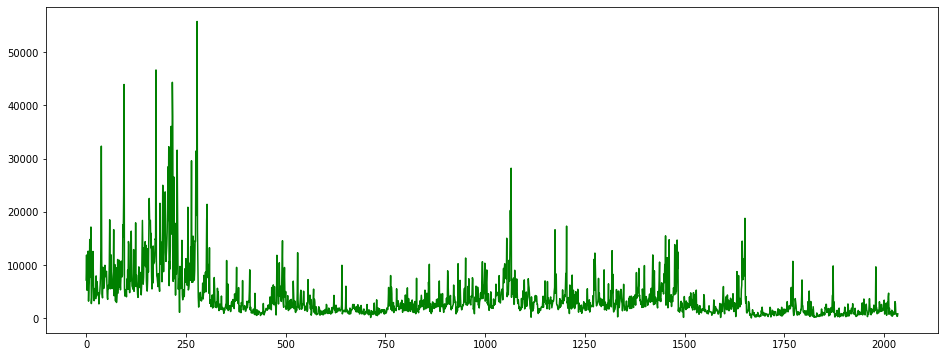

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data_turnover,color='g')
plt.show()

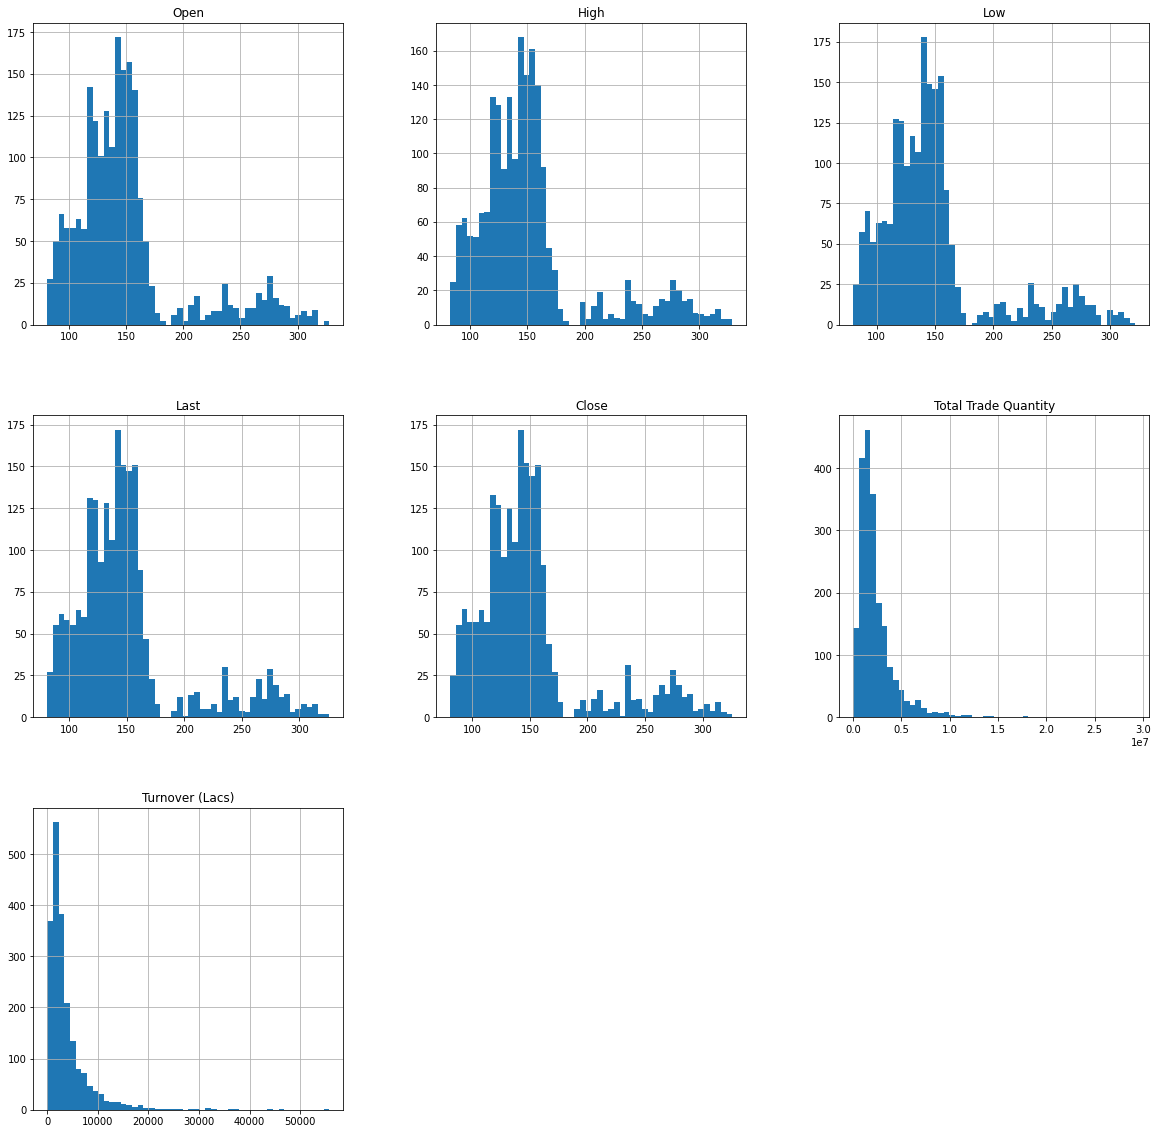

In [ ]:
data.hist(bins=50,figsize=(20,20))


plt.show()

#6) Scalling of Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_close=scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [ ]:
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
data_close.ndim

2

In [ ]:
data_close.shape

(2035, 1)

In [ ]:
# We will divide the data into train and test set
train=int(len(data_close)*0.75)
test=len(data_close)-train
train_data,test_data=data_close[0:train,:],data_close[train:len(data_close),:1]

In [ ]:
train,test

(1526, 509)

In [ ]:
len(train_data),len(test_data)

(1526, 509)

### Spliting for X_train,X_test,y_train,y__test

In [ ]:
def datastore(datasplit,step=1):
    dataX,datay=[],[]
    for i in range(len(datasplit)-step-1):
        dataX.append(datasplit[i:(i+step),0])
        datay.append(datasplit[i+step,0])
    return np.array(dataX),np.array(datay)
step=100
X_train,y_train=datastore(train_data,step)
X_test,y_test=datastore(test_data,step)

In [ ]:
print(X_train.shape)

(1425, 100)


In [ ]:
print(y_train.shape)

(1425,)


In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

###After Converting data into required Dimension

In [ ]:
X_train.shape 

(1425, 100, 1)

In [ ]:
y_train.shape

(1425,)

In [ ]:
X_train.ndim

3

In [ ]:
y_train.ndim

1

In [ ]:
X_test.shape 

(408, 100, 1)

In [ ]:
y_test.shape 

(408,)

In [ ]:
X_test.ndim

3

In [ ]:
y_test.ndim

1

#7) Prepare Stacked LSTM

In [ ]:
#Built LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#copile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=64,verbose=1)

Epoch 1/25
23/23 [==============================] - 13s 355ms/step - loss: 0.0226 - val_loss: 0.0031
Epoch 2/25
23/23 [==============================] - 8s 363ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 3/25
23/23 [==============================] - 6s 240ms/step - loss: 0.0010 - val_loss: 9.0083e-04
Epoch 4/25
23/23 [==============================] - 7s 291ms/step - loss: 8.4537e-04 - val_loss: 8.3171e-04
Epoch 5/25
23/23 [==============================] - 6s 240ms/step - loss: 8.2666e-04 - val_loss: 8.9530e-04
Epoch 6/25
23/23 [==============================] - 6s 240ms/step - loss: 7.8871e-04 - val_loss: 9.6092e-04
Epoch 7/25
23/23 [==============================] - 6s 240ms/step - loss: 7.5972e-04 - val_loss: 7.4057e-04
Epoch 8/25
23/23 [==============================] - 6s 244ms/step - loss: 7.3583e-04 - val_loss: 7.6197e-04
Epoch 9/25
23/23 [==============================] - 13s 556ms/step - loss: 7.0431e-04 - val_loss: 8.2900e-04
Epoch 10/25
23/23 [===========================

In [ ]:
# lets Check the prediction
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [ ]:
y_train_predict=scaler.inverse_transform(y_train_predict)
y_test_predict=scaler.inverse_transform(y_test_predict)

#8) Prediction of data

In [ ]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test,y_test_predict))

107.66317955232189

In [ ]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_train,y_train_predict))

165.77896386166597

#9) Ploting the Graph for Visualization

In [ ]:
# Shifting both data so that they can be plotted in proper way
steps=100
y_train_predict_plot=np.empty_like(data_close)
y_train_predict_plot[:,:]=np.nan
y_train_predict_plot[steps:len(y_train_predict)+steps,:]=y_train_predict

########################################################################
y_test_predict_plot=np.empty_like(data_close)
y_test_predict_plot[:,:]=np.nan
y_test_predict_plot[len(y_train_predict)+(steps*2)+1:len(data_close)-1,:]=y_test_predict

In [ ]:
y_test_predict_plot[:,:]

array([[         nan],
       [         nan],
       [         nan],
       ...,
       [120.24474335],
       [120.75917053],
       [         nan]])

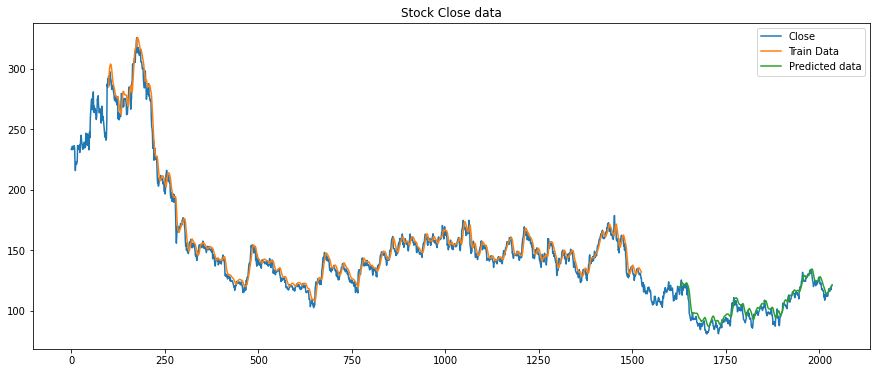

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(data_close),label = "Close")
plt.plot(y_train_predict_plot,label="Train Data")
plt.plot(y_test_predict_plot,label="Predicted data")
plt.legend()
plt.title("Stock Close data")
plt.show()

In [ ]:
test_data.shape

(509, 1)

In [ ]:
len(test_data), X_test.shape

(509, (408, 100, 1))

In [ ]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

#10) Predicting Stock for next 30 Days

In [ ]:
tem_input = list(x_input)
tem_input = tem_input[0].tolist()

list_output=[]
steps=100
nextNoOfDays = 30
i=0

while(i<nextNoOfDays+1):
    
    if(len(tem_input)>100):
        x_input=np.array(tem_input[1:])
        print("\n\n{} day input \n{}\n".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("\n{} day output {}\n\n".format(i,yhat))
        tem_input.extend(yhat[0].tolist())
        tem_input=tem_input[1:]
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0],"\n")
        tem_input.extend(yhat[0].tolist())
        print(len(tem_input))
        list_output.extend(yhat.tolist())
        i=i+1
    

print(list_output,"\n")

5.475518418649168

##Thank you!!